In [23]:
# iris decisin tree

In [24]:
import pandas as pd

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [26]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [27]:
# view data

In [28]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
train_x, test_x, train_y, test_y = train_test_split(x,y)

In [31]:
# tree

In [32]:
from sklearn import tree
from sklearn.metrics import classification_report

In [33]:
dtc = tree.DecisionTreeClassifier(max_depth=3)
dtc = dtc.fit(train_x, train_y)

In [34]:
preds = dtc.predict(test_x)

In [35]:
# good accuracy for such a simple model
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      1.00      0.91        10
           2       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



[Text(0.375, 0.875, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [37, 40, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.498\nsamples = 75\nvalue = [0, 40, 35]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

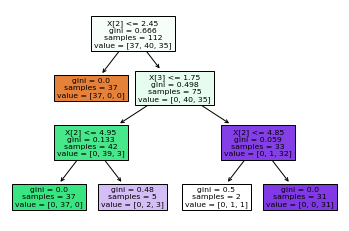

In [36]:
tree.plot_tree(dtc, filled=True)

In [37]:
text_rep = tree.export_text(dtc)
print(text_rep)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [38]:
text_rep_lines= text_rep.split('\n')
text_rep_lines[:4]

['|--- feature_2 <= 2.45',
 '|   |--- class: 0',
 '|--- feature_2 >  2.45',
 '|   |--- feature_3 <= 1.75']

In [39]:
def code_from_tree_text(text_lines):
    if type(text_lines) == str:
        text_lines = text_lines.split('\n')
    body='def classify(row):\n'
    for i,line in enumerate(text_lines):
        
        level = line.count('|')
        line = line.replace('|',' ')
        line = line.replace('---',' ')

        # change if feature_3 >0.70: to row[3] > 0.70:
        line = line.replace('feature_','row[')

        nline=line.split()
        if len(nline)==0:
            break
        # print(i,nline)
        depth = ' '*level*2
        if 'class:' in line:
            #print(depth, 'return',nline[-1])
            body+=''+depth+'return '+nline[-1]+'\n'
        else:
            #print(depth, 'if', nline[0], nline[1], nline[-1], ':')
            body+=''+depth+'if '+nline[0]+'] '+nline[1]+' '+nline[-1]+':\n'
        #break
    #print('# from decision tree to code')
    #print(body)
    return body


In [40]:
code = code_from_tree_text(tree.export_text(dtc))
print(code)

def classify(row):
  if row[2] <= 2.45:
    return 0
  if row[2] > 2.45:
    if row[3] <= 1.75:
      if row[2] <= 4.95:
        return 1
      if row[2] > 4.95:
        return 2
    if row[3] > 1.75:
      if row[2] <= 4.85:
        return 1
      if row[2] > 4.85:
        return 2



In [48]:
func = exec(code)
classify=globals()['classify']


In [50]:
classify

<function __main__.classify(row)>

In [49]:
classify(test_x[0])

2

In [44]:
# lets use that code
# def classify(row):
#   if row[3] <= 0.70:
#     return 0
#   if row[3] > 0.70:
#     if row[3] <= 1.75:
#       if row[2] <= 5.05:
#         return 1
#       if row[2] > 5.05:
#         return 2
#     if row[3] > 1.75:
#       if row[2] <= 4.85:
#         return 2
#       if row[2] > 4.85:
#         return 2

In [45]:
test_x[0]

array([6.9, 3.1, 5.4, 2.1])

In [46]:
ok,wrong=0,0
for i,y in enumerate(test_y):
    pred = classify(test_x[i])
    print(i,pred,test_y[i])
    if pred==test_y[i]:
        ok+=1
    else:
        wrong+=1
print('ok:',ok,'wrong:',wrong)

0 2 2
1 0 0
2 2 2
3 1 1
4 0 0
5 1 1
6 2 2
7 2 2
8 1 2
9 1 1
10 2 2
11 2 2
12 1 1
13 1 1
14 2 2
15 1 2
16 1 1
17 2 2
18 0 0
19 0 0
20 0 0
21 2 2
22 0 0
23 0 0
24 2 2
25 0 0
26 0 0
27 1 1
28 1 1
29 2 2
30 0 0
31 2 2
32 2 2
33 0 0
34 1 1
35 0 0
36 1 1
37 0 0
ok: 36 wrong: 2
